# Building Your First Classification Model

© 2016 STREAMBRIGHT DATA LLC, ALL RIGHTS RESERVED

Building your first machine learning model for classification. Learning the K Nearest Neighbor (KNN) algorithm and the how to measure its performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

## Introducing the Iris Flower Dataset

Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936.

Typical test case for Classification problems in machine learning.

![petal-sepal](../files/0301_petal-sepal.png "Petal and Sepal")

![iris](../files/0302_iris.png "Iris")

### Loading the data

In [2]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Examining the data

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


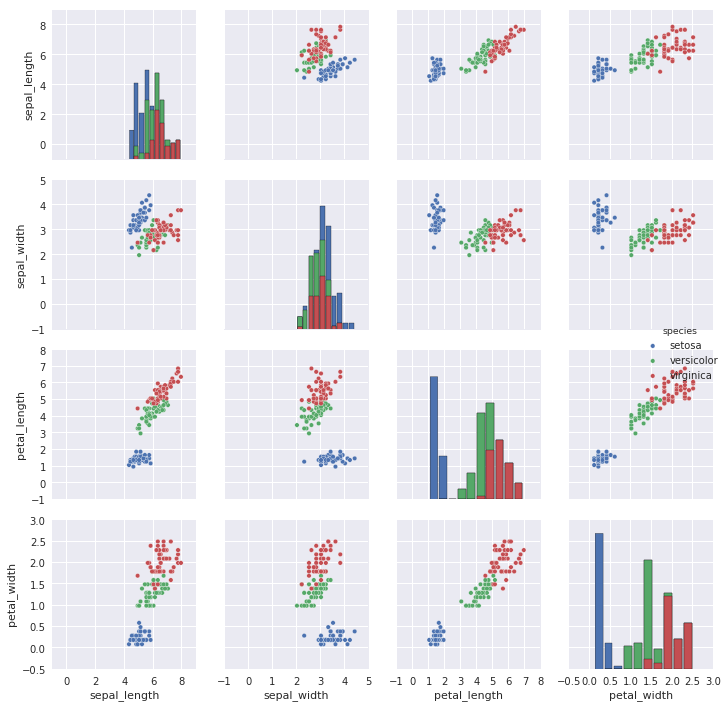

In [5]:
sns.pairplot(iris, hue="species")

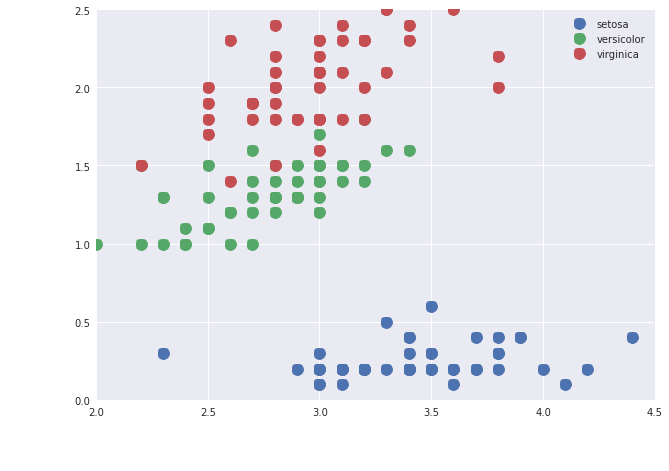

In [6]:
groups = iris.groupby('species')

fig, ax = plt.subplots(figsize=(10,7))
for name, group in groups: 
    ax.plot(group.sepal_width, group.petal_width, marker='o', linestyle='', ms=12, label=name)
ax.legend()

## Nearest Neighbors Classification

We will learn k-Nearest Neighbors algorithm (or k-NN for short).

3 important settings:
* `k` - # of neighbors
* distance
* weights

![knn_theory](../files/0303_knn_theory.png "kNN Theory")

### Preparing the dataset

First, we separate the feature matrix from the label vector.

In [7]:
X = iris.ix[:,:4]
y = iris["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Training the model

When we have our feture matrix (X) and label vector (y) we are ready to use this data to train the model. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Then we measure the model's accuracy.

In [10]:
knn.score(X, y)

0.97999999999999998

### Predicting with our model

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let make up a new data point:

In [12]:
new_data = [4.5, 3, 5, .5]

Predict the category of our new sample:

In [13]:
print(knn.predict([new_data]))
print(knn.predict_proba([new_data]))

['versicolor']
[[ 0.   0.9  0.1]]


## kNN Classification on "Real" Data

In the next section we use our bank marketing data set to test the kNN methodology.

In [14]:
data = pd.read_csv("../files/bank.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Feature list with descriptions

**Bank client data:**

* 1 - **age** (numeric)
* 2 - **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - **default:** has credit in default? (categorical: 'no','yes','unknown')
* 6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')
* 7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

* 8 - contact: contact communication type (categorical: 'cellular','telephone') 
* 9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* 12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Select non-category type features for building our kNN model. 

In [15]:
data.drop(data.ix[:,1:10], axis=1, inplace=True)
data.drop("poutcome", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 11 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(1)
memory usage: 3.8+ MB


In [16]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Sampling the Data

We will only use a subsample of the data.

We have to select a 50-50% sample (subscribed - not subscribed).

In [17]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [18]:
n = 4500
sample_yes = data.ix[data.y == "yes"].sample(n=n, replace=False, random_state=0)
sample_no = data.ix[data.y == "no"].sample(n=n, replace=False, random_state=0)
df = pd.concat([sample_yes, sample_no])
df = df.sample(frac=1, replace=False, random_state=0)
X = df.drop('y', axis=1)  
y = df.ix[:, 'y']
y.replace("yes", 1, inplace=True)
y.replace("no", 0, inplace=True)

In [19]:
print X.shape
print y.shape

(9000, 10)
(9000,)


### Splitting data into training and test sets

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

### Fitting the kNN model on the training set

In [21]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.89081481481481484

### Measuring predictive efficiency with test set

In [22]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

from sklearn import metrics

print "Model accuracy: %0.2f" % metrics.accuracy_score(y_test, predicted)
print
print "Confusion Matrix: \n"
print metrics.confusion_matrix(y_test, predicted)
print
print "Classification Report \n"
print metrics.classification_report(y_test, predicted)

Model accuracy: 0.86

Confusion Matrix: 

[[934 167]
 [154 995]]

Classification Report 

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1101
          1       0.86      0.87      0.86      1149

avg / total       0.86      0.86      0.86      2250



precision = % of correct classifications (tp / (tp + fp))

recall = the ability of the classifier to find all the positive samples (tp / (tp + fn))

f1-score = harmonic average of precision and recall

support = all samples in that class

![accuracy](../files/0304_accuracy.jpeg "Accuracy")

If 100 patients known to have a disease were tested, and 43 test positive, then the test has 43% **sensitivity**.

If 100 with no disease are tested and 96 return a negative result, then the test has 96% **specificity**.